In [82]:
from scipy.integrate import quad
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import signal

#Все необходимое
def f(x):
    if x < 0.5:
      return 1
    return 0

def w():
    return 2*math.pi/2

def printGraphic(name, kn):
    plt.title(name)
    plt.plot(range(len(kn)) , kn,'g')
    plt.grid(True)
    plt.show()

def printCoefCompare(name , orig , hann, hemm):
    plt.figure(figsize=(20,10))
    plt.xlim (0, 20)
    plt.title(name)
    ln = range(len(orig))
    plt.plot(ln , orig,'r', label="Without")
    plt.plot(ln , hann,'b', label="Hanna")
    plt.plot(ln , hemm,'g', label="Hemming")
    plt.legend()
    plt.grid(True)
    plt.show()

def printGraphicCompare(name , orig , hann, hemm):
    plt.figure(figsize=(20,10))
    plt.title(name)
    ln = range(len(orig))
    plt.plot(ln , orig,'r', label="Without")
    plt.plot(ln , hann,'b', label="Hanna")
    plt.plot(ln , hemm,'g', label="Hemming")
    plt.legend()
    plt.grid(True)
    plt.show()

def Hanna(x):
    return 1+np.cos(2*np.pi*x/b)/2

def Hemming(x):
    return 0.54+0.46*np.cos(2*np.pi*x/b)

N = 100

int_start = 0
int_end = 1

precision =100

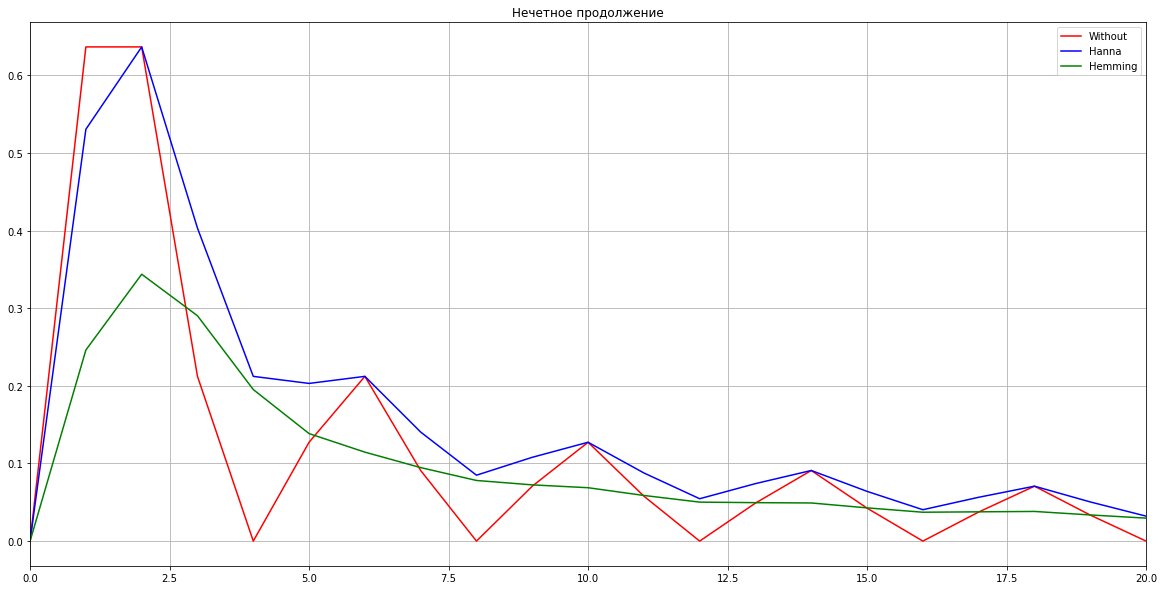

In [83]:
#Продолжаем нечетным образом f(x) = -f(-x)
#Ищем b_n

def func_sin(x,n):
    return f(x)*np.sin(n*x*w())

b_n = []
b_n_hanna =[]
b_n_hemm =[]

for i in range(N):
    b_n.append(2 / int_end * quad(lambda x,n:func_sin(x,n), int_start, int_end, args=(i))[0])

for i in range(N):
    b_n_hanna.append(2 / int_end * quad(lambda x,n: Hanna(x)*func_sin(x,n), int_start, int_end, args=(i))[0])

for i in range(N):
    b_n_hemm.append(2 / int_end * quad(lambda x,n: Hemming(x)*func_sin(x,n), int_start, int_end, args=(i))[0])

printCoefCompare("Нечетное продолжение",b_n ,b_n_hanna , b_n_hemm);



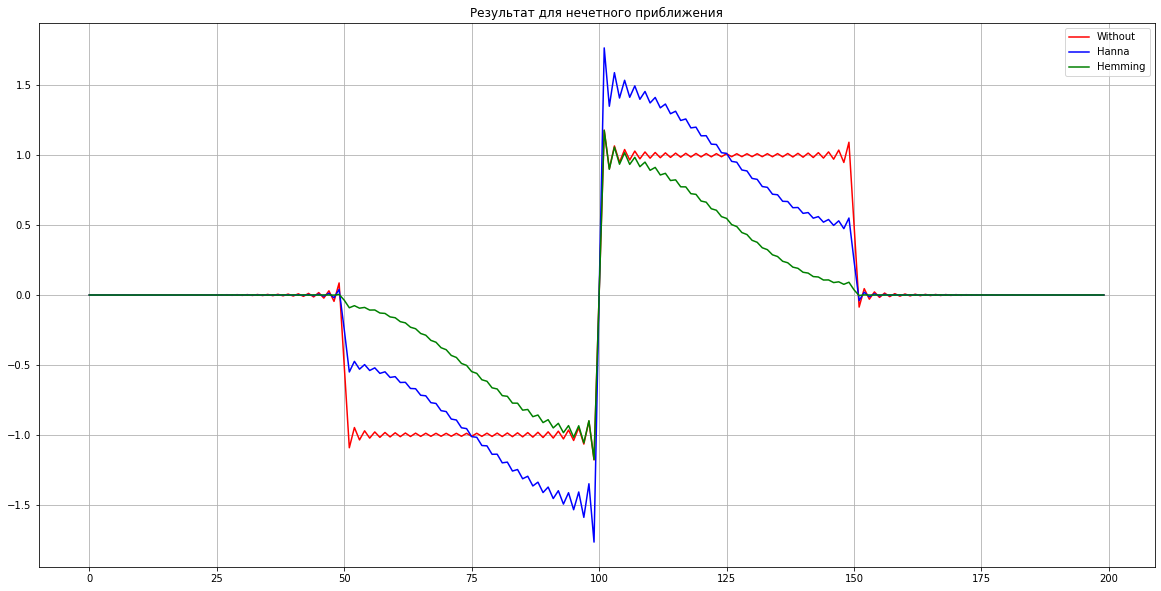

In [84]:
#проверка
def f_sin(x , bcoef):
    result = 0
    for n in range(1,N):
        result += bcoef[n] * np.sin(n*x*w())
    return result
        

f_x_sin = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin.append(f_sin(i/precision,b_n))

f_x_sin_hann = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin_hann.append(f_sin(i/precision,b_n_hanna))

f_x_sin_hemm = []
for i in range(-int_end*precision,int_end*precision):
    f_x_sin_hemm.append(f_sin(i/precision,b_n_hemm))

printGraphicCompare('Результат для нечетного приближения' ,f_x_sin ,f_x_sin_hann,f_x_sin_hemm)

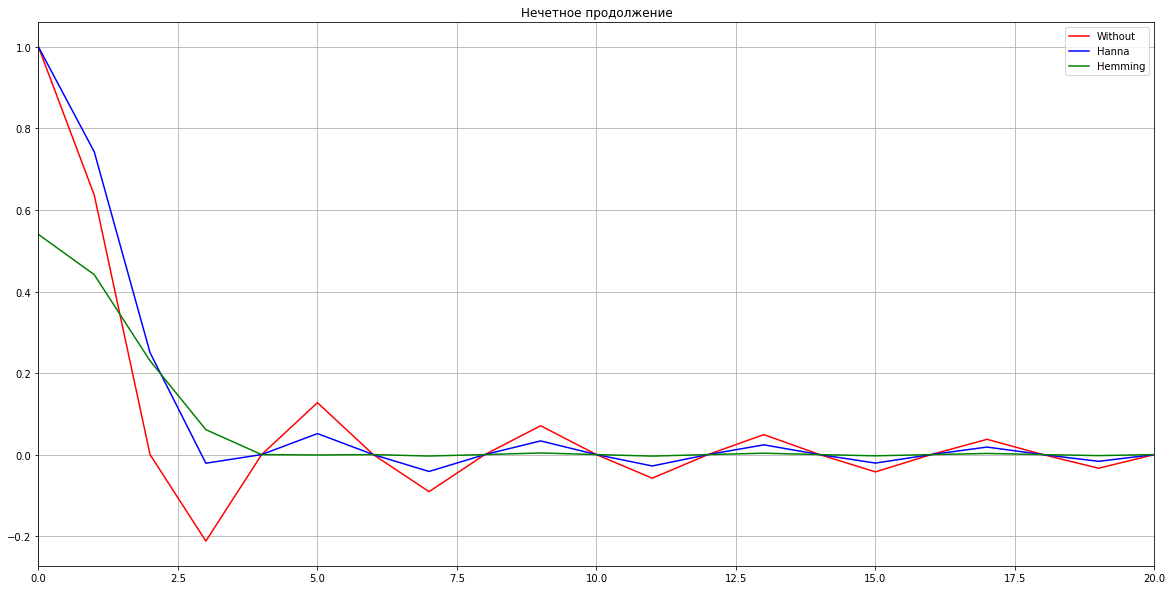

In [85]:
#Продолжаем четным образом f(x) = f(-x)
#Ищем b_n

def func_cos(x,n):
    return f(x)*np.cos(n*x*w())

a_n = []
a_n_hanna =[]
a_n_hemm =[]

for i in range(N):
    a_n.append(2 / int_end * quad(lambda x,n:func_cos(x,n), int_start, int_end, args=(i))[0])

for i in range(N):
    a_n_hanna.append(2 / int_end * quad(lambda x,n: Hanna(x)*func_cos(x,n), int_start, int_end, args=(i))[0])

for i in range(N):
    a_n_hemm.append(2 / int_end * quad(lambda x,n: Hemming(x)*func_cos(x,n), int_start, int_end, args=(i))[0])

printCoefCompare("Нечетное продолжение",a_n ,a_n_hanna , a_n_hemm);

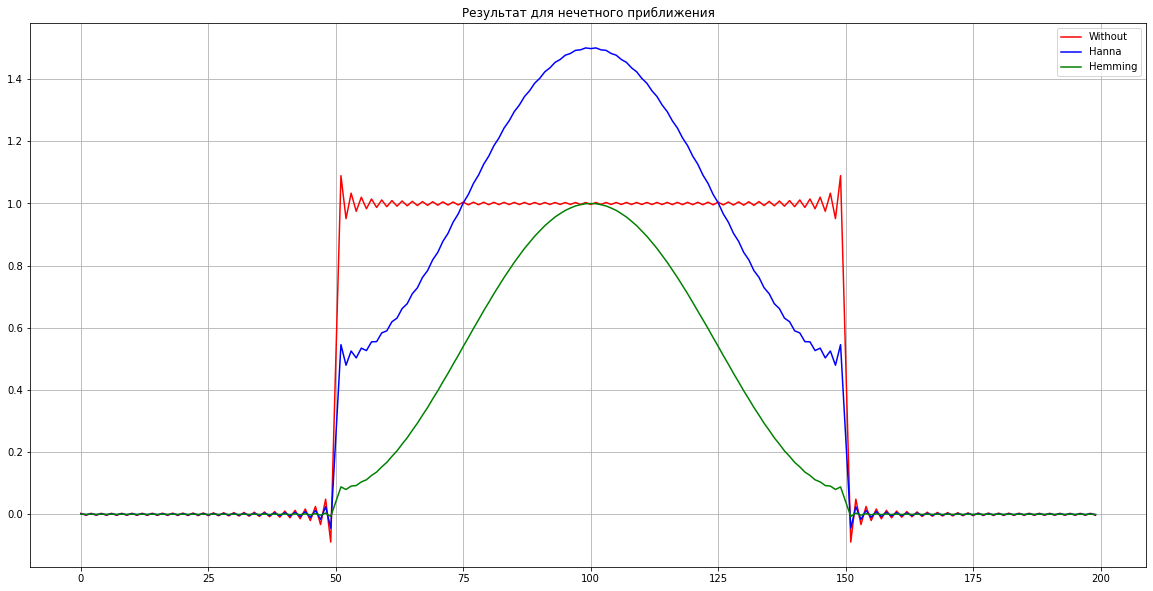

In [86]:
#проверка
def f_cos(x , acoef):
    result = acoef[0]/2
    for n in range(1,N):
        result += acoef[n] * np.cos(n*x*w())
    return result
        

f_x_cos = []
for i in range(-int_end*precision,int_end*precision):
    f_x_cos.append(f_cos(i/precision,a_n))

f_x_cos_hann = []
for i in range(-int_end*precision,int_end*precision):
    f_x_cos_hann.append(f_cos(i/precision,a_n_hanna))

f_x_cos_hemm = []
for i in range(-int_end*precision,int_end*precision):
    f_x_cos_hemm.append(f_cos(i/precision,a_n_hemm))

printGraphicCompare('Результат для нечетного приближения' ,f_x_cos ,f_x_cos_hann,f_x_cos_hemm)